<center><h1>CPE 4903 Fall 2023: Homework 2</h1></center>

### Submission:
 * Submit this notebook file and the pdf version.
 * Deadline: 11:59 pm, 9/3

__In this assignment, you will work on finding the optimal weights for a univariate linear regression model:__

- Calculate the theoretical values using Normal Equaiton
- Compute the Gradient Descent Algorithm 
- Examine the impact of size of the learning rate

__You will try to understand the codes, execute the codes, and work on 7 exercises throughout the assignment.__

## Problem Statement

The hypothetical training dataset below contains 4 real-estate transactions in a small town. 
Your job is to create a __univariate linear regression model__ to predict the home price based on the home size.

| Size (100 sqft)     | Price ($ thousands) |
| ----------------| ------------------------ |
| 8            | 100                      |
| 10            | 130                      |
| 12            | 150                      |
| 14            | 180                      |

## 1. Load and Plot the Dataset

### Exercise 1: 

__In the cell below, write two lines of codes to load the training data into x_train and y_train, which are both list data type.__ 

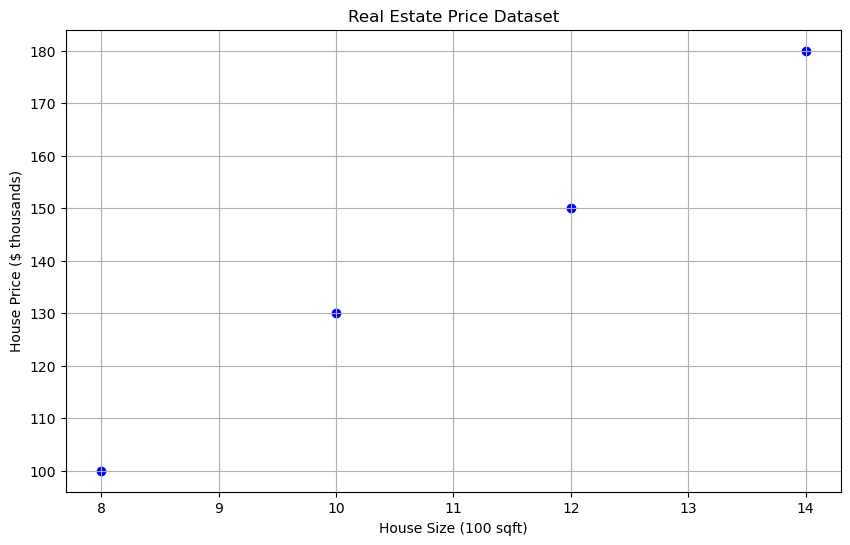

In [2]:
import matplotlib.pyplot as plt
import math

# Real estate price dataset
# WRITE YOUR CODES HERE  
x_train = [8, 10, 12, 14]         # home size in 100 sqft
y_train = [100, 130, 150, 180]         # home price in $1,000

# Creating a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, color='blue')
plt.xlabel('House Size (100 sqft)')
plt.ylabel('House Price ($ thousands)')
plt.title('Real Estate Price Dataset')
plt.grid(True)
plt.show()

## 2. Closed-Form Solution: Normal Equation

In the lecture, we derived a closed-form solution for finding the optimal values of $a_{0}$ and $a_{1}$, which is equivalent to solving the two linear equations shown below. <br>

$$\left(\sum\limits_{i = 1}^{m} i \right) a_{0} +  \left(\sum\limits_{i = 1}^{m} x^{(i)} \right)a_{1} = \sum\limits_{i = 1}^{m} y^{(i)}$$ <br>
$$\left(\sum\limits_{i = 1}^{m} x^{(i)}\right)a_{0} + \left(\sum\limits_{i = 1}^{m} (x^{(i)})^{2}\right)a_{1} =
\sum\limits_{i = 1}^{m} x^{(i)} y^{(i)}$$
<br>Or, we can re-write the two linear equations as the equivalent __matrix form__, that is,

$$C\times A=B$$
where
$$A = \begin{bmatrix} a_{0} \\ a_{1} \end{bmatrix} \quad C = \begin{bmatrix} c_{11} & c_{12} \\ c_{21} & c_{22} \end{bmatrix} \quad B = \begin{bmatrix} b_{0} \\ b_{1} \end{bmatrix} \quad$$
and
$$c_{11}= \sum\limits_{i = 1}^{m} i =m, \quad  c_{12}=c_{21}=\sum\limits_{i = 1}^{m} x^{(i)}, \quad c_{22}=\sum\limits_{i = 1}^{m} (x^{(i)})^{2}$$
$$b_{0}=\sum\limits_{i = 1}^{m} y^{(i)}, \quad   b_{1}=\sum\limits_{i = 1}^{m} x^{(i)} y^{(i)}$$ <br>

__The closed-form solution is then expressed by the following matrix format:__ <br><br>
$$A = C^{-1}\times B, \quad \text{where } C^{-1} \text{ is the inverse of matric C} \tag{1}$$

### Exercise 2: 

#### Please write Python code to calculate the following coefficients: $c11, c12, c21, c22, b0, b1$. Use a print command to show the results.

In [14]:
# Write your code to calculate those coefficients

c11 = sum(range(1, len(x_train) + 1))
c12, c21 = sum(x_train), sum(x_train)
c22 = sum([size**2 for size in x_train])

print(f'c11 = {c11}, c12 = {c12}, c21 = {c21}, c22 = {c22}')

b0 = sum(y_train)
b1 = sum([x_train[i]*y_train[i] for i in range(len(x_train))])

print(f'b0 = {b0}, b1 = {b1}')


c11 = 10, c12 = 44, c21 = 44, c22 = 504
b0 = 560, b1 = 6420


### Exercise 3:

- We utilize the linear algebra package from NumPy to solve the linear equations. The approach can be used to verify the hand-calculated results from the written part of the homework.<br><br>
- Given the function __Normal_Equation__, write Python code to calculate the optimal $a_{0}$ and $a_{1}$. Use a print command to show the results.

In [16]:
import numpy as np

def normal_equation(c11, c12, c21, c22, b0, b1):
    ''' 
    Input parameters:
        c11, c12, c21, c22: elements in matrix C
        b0, b1: elements in matrix B
    Outputs:
        a0, a1
    '''
    
    C = np.array([[c11, c12],[c21, c22]])    # 2x2 matrix C
    B = np.array([b0, b1]).T                 # 2x1 matrix B, T = matrix transpose
    
    C_inv = np.linalg.inv(C)                 # Inversion of C
    
    A = np.dot(C_inv, B)                     # Matrix multiplication np.dot
    
    return A[0], A[1]

In [18]:
## WRITE YOUR CODE HERE.

a0, a1 = normal_equation(c11, c12, c21, c22, b0, b1)
print(f'a0 = {a0}, a1 = {a1}')

# answer matches with the calculated values

a0 = -0.07731958762884972, a1 = 12.74484536082474


### Extra Credit: 

__Can you plot the regression line, based on the optimal $a_{0}$ and $a_{1}$, and overlay it with the original four data points?__

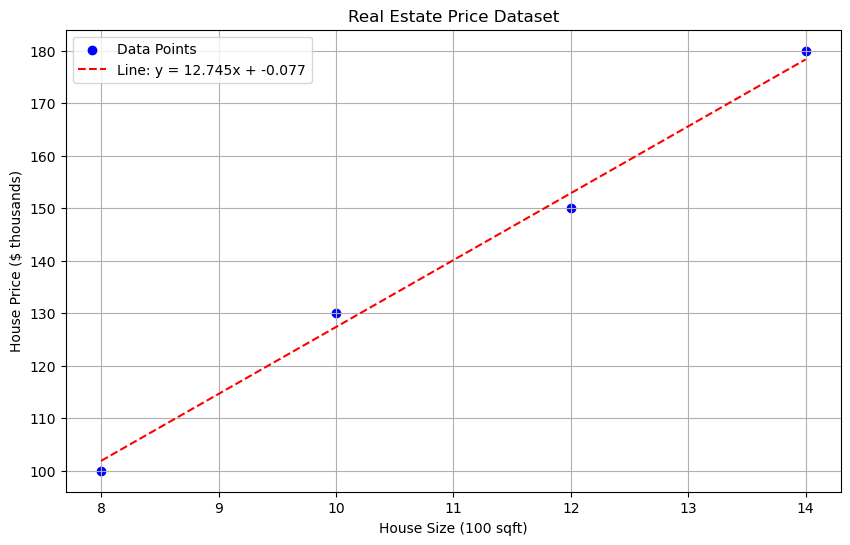

In [23]:
import matplotlib.pyplot as plt

# Real estate price dataset
x_train = [8, 10, 12, 14]    # home size in 100 sqft
y_train = [100, 130, 150, 180]    # home price in $1,000

# equation of the line, in the form y = mx + b
m = a1  
b = a0  

# Calculate y values for the line using the equation
x_line = [min(x_train), max(x_train)]  # Use the range of x_train for the line
y_line = [((m * x) + b) for x in x_line]

# Creating a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, color='blue', label='Data Points')  # Scatter plot
plt.plot(x_line, y_line, color='red', linestyle='--', label=f'Line: y = {round(m, 3)}x + {round(b, 3)}')  # Line plot
plt.xlabel('House Size (100 sqft)')
plt.ylabel('House Price ($ thousands)')
plt.title('Real Estate Price Dataset')
plt.grid(True)

# Adding a legend
plt.legend()

plt.show()


## 3. Compute Cost Function

This is where you calculate the mean squared-error cost function, $J(A)$.
$$J(A)= \frac{1}{2m}\sum_{i=1}^{m}[a_0+a_1x^{(i)}-y^{(i)}]^{2} \tag{2} $$
### Exercise 4: 
__In the following function, compute_cost, please complete the codes that implement (2).__

In [28]:
def compute_cost(x, y, a1, a0):
    '''
    
    Input parameters:
    (x, y): the training data
    a0, a1: the parameters for the linear regression
    
    '''
   
    m = len(x)    # This will give you the size of the dataset, m 
    cost = 0
    
    ### Your code starts here.
    for i in range(m):
        h_x = a0 + a1*(x[i]) # a0 + a_1*x_i
        cost += (h_x - y[i]) ** 2 # (h_x - y_i)^2

        
    total_cost = cost / (2 * m)

    ### Your code ends here.
    
    return total_cost

### Exercise 5:

In the cell below, please write codes to calculate the following sets of weights.
1. $a_{0} = 0, a_{1}= 13$ <br>
2. $a_{0} = 0, a_{1}= 16$ <br>
3. $a_{0} = 10, a_{1}= 10$

In [30]:
## Write your code here to compute the costs.
print(f'a0 = {0}, a1 = {13}, J(A) = {compute_cost(x_train, y_train, 13, 0)}')
print(f'a0 = {0}, a1 = {16}, J(A) = {compute_cost(x_train, y_train, 16, 0)}')
print(f'a0 = {10}, a1 = {10}, J(A) = {compute_cost(x_train, y_train, 10, 10)}')

# answers match with the calculated value


a0 = 0, a1 = 13, J(A) = 7.0
a0 = 0, a1 = 16, J(A) = 673.0
a0 = 10, a1 = 10, J(A) = 225.0


## 4. Gradient Descent Summary
The __*Gradient Descent*__ algorithm is described as:
$$\begin{align*} \text{Repeat}&\text{ updating the weights until convergence:} \;  \lbrace  \newline
\;  a_{1} &= a_{1} -  \alpha \frac{\partial J(A)}{\partial a_{1}} \tag{3}  \; \newline 
 a_{0} &= a_{0} -  \alpha \frac{\partial J(A)}{\partial a_{0}}  \newline \rbrace
\end{align*}$$
where, $J(A)$ is the cost function and parameters $a_{0}$, $a_{1}$ are updated simultaneously.  

The __gradient__ is defined as:
$$
\begin{align}
\frac{\partial J(A)}{\partial a_{1}}  &= \frac{1}{m} \sum\limits_{i = 1}^{m} (h(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(A)}{\partial a_{0}}  &= \frac{1}{m} \sum\limits_{i = 1}^{m} (h(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

## 4.1. Implement Gradient Descent
You will implement gradient descent algorithm for one feature. You will need three functions. 
- `compute_gradient` implementing equation (4) and (5) above
- `compute_cost` implementing equation (2) above (Section 3)
- `gradient_descent`, utilizing compute_gradient and compute_cost

Conventions:
- The naming of python variables containing partial derivatives follows this pattern,$\frac{\partial J(A)}{\partial a_{0}}$  will be `dj_da0`.

### compute_gradient

`compute_gradient`  implements (4) and (5) above and returns $\frac{\partial J(A)}{\partial a_{1}}$,$\frac{\partial J(A)}{\partial a_{0}}$. The embedded comments describe the operations.

In [31]:
def compute_gradient(x, y, a1, a0): 
    """
    Computes the gradient for linear regression 
    Args:
      x : feature ata, m examples 
      y : target values
      a1, a0 (scalar) : model parameters  
    Returns
      dj_da1 (scalar): The gradient of the cost w.r.t. the parameters a1
      dj_da0 (scalar): The gradient of the cost w.r.t. the parameter a0   
     """
    
    # Number of training examples
    m = len(x)  
    dj_da1 = 0
    dj_da0 = 0
    
    for i in range(m):  
        h_x = a1 * x[i] + a0 
        dj_da1_i = (h_x - y[i]) * x[i] 
        dj_da0_i = h_x - y[i] 
        dj_da1 += dj_da1_i
        dj_da0 += dj_da0_i
        
    dj_da1 = dj_da1 / m 
    dj_da0 = dj_da0 / m 
        
    return dj_da1, dj_da0

###  Gradient Descent Implementation
The details of the implementation are described in the comments. Below, you will utilize this function to find optimal values of $a_{1}$ and $a_{0}$ on the training data.

### Exercise 6: 
Please follow the instructions in the function below to complete the codes.

In [32]:
def gradient_descent(x, y, a1_in, a0_in, alpha, num_iters): #cost_function, gradient_function): 
    """
    
    Performs gradient descent to find the optimal a1 and a0. 
    Updates the weights by taking num_iters gradient steps with learning rate alpha.
    
    Input parameters:
      x  : input data, m examples 
      y  : target values
      a1_in, a0_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      a1 (scalar): Updated value of parameter after running gradient descent
      a0 (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [a1, a0] 
    
    """
    
    # An array to store cost J and a0/a1 at each iteration primarily for plotting later
    J_history = []
    p_history = []
    a0 = a0_in
    a1 = a1_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using compute_gradient function
        # WRITE YOUR CODE HERE
        dj_da1, dj_da0 = compute_gradient(x, y, a1, a0)

        # Update Parameters using equation (3) above
        # WRITE YOUR CODE HERE
        a0 -= alpha * dj_da0                            
        a1 -= alpha * dj_da1                

        # Save cost J and weights at each iteration
        J_history.append(compute_cost(x, y, a1, a0))
        p_history.append([a1, a0])
            
        # Print cost every at intervals 10 times or as many iterations if < 10
        if (i+1)% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i+1:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_da1: {dj_da1: 0.3e}, dj_da0: {dj_da0: 0.3e}  ",
                  f"a1: {a1: 0.3e}, a0:{a0: 0.5e}")
 
    return a1, a0, J_history, p_history

### 4.2. Run the Gradient Descent Algorithm

In [33]:
# initialize parameters
a0_init = 0
a1_init = 0

# Gradient descent settings
num_iters = 10000
alpha = 0.005     # Learning rate

# Run gradient descent

a1_opt, a0_opt, J_hist, p_hist = gradient_descent(x_train ,y_train, a1_init, a0_init, alpha, num_iters)

print(f"(a1, a0) found by gradient descent: ({a1_opt:8.4f}, {a0_opt:8.4f})")

Iteration 1000: Cost 2.73e+00  dj_da1: -1.159e-02, dj_da0:  1.328e-01   a1:  1.271e+01, a0: 3.70381e-01
Iteration 2000: Cost 2.65e+00  dj_da1: -9.521e-03, dj_da0:  1.090e-01   a1:  1.276e+01, a0:-2.32084e-01
Iteration 3000: Cost 2.60e+00  dj_da1: -7.819e-03, dj_da0:  8.954e-02   a1:  1.280e+01, a0:-7.26856e-01
Iteration 4000: Cost 2.57e+00  dj_da1: -6.422e-03, dj_da0:  7.353e-02   a1:  1.284e+01, a0:-1.13319e+00
Iteration 5000: Cost 2.55e+00  dj_da1: -5.274e-03, dj_da0:  6.039e-02   a1:  1.287e+01, a0:-1.46688e+00
Iteration 6000: Cost 2.53e+00  dj_da1: -4.331e-03, dj_da0:  4.959e-02   a1:  1.289e+01, a0:-1.74093e+00
Iteration 7000: Cost 2.52e+00  dj_da1: -3.557e-03, dj_da0:  4.073e-02   a1:  1.291e+01, a0:-1.96599e+00
Iteration 8000: Cost 2.51e+00  dj_da1: -2.921e-03, dj_da0:  3.345e-02   a1:  1.293e+01, a0:-2.15083e+00
Iteration 9000: Cost 2.51e+00  dj_da1: -2.399e-03, dj_da0:  2.747e-02   a1:  1.294e+01, a0:-2.30262e+00
Iteration 10000: Cost 2.51e+00  dj_da1: -1.970e-03, dj_da0:  2.2

Note some characteristics of the gradient descent process printed above.  

- The cost starts large and rapidly declines as described in the slide from the lecture.
- The partial derivatives, `dj_da1`, and `dj_da0` also get smaller, rapidly at first and then more slowly. As shown in the diagram from the lecture, as the process nears the 'bottom of the bowl' progress is slower due to the smaller value of the derivative at that point.
- progress slows though the learning rate, alpha, remains fixed

### 4.3. Cost versus iterations of gradient descent 
A plot of cost versus iterations is a useful measure of progress in gradient descent. Cost should always decrease in successful runs. The change in cost is so rapid initially, it is useful to plot the initial decent on a different scale than the final descent. In the plots below, note the scale of cost on the axes and the iteration step.

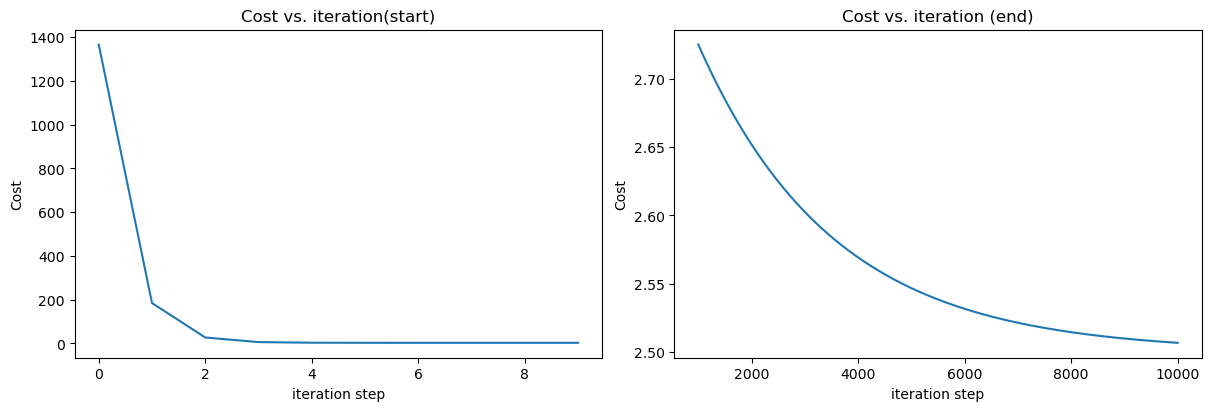

In [34]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:10])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

### Exercise 7: Impact of  Learning Rate

In the lecture, there was a discussion related to the proper value of the learning rate, $\alpha$ in equation(3). The larger $\alpha$ is, the faster gradient descent will converge to a solution. But, if it is too large, gradient descent will diverge. Above you have an example of a solution which converges nicely.

#### You will repeat the procedures: "Run the Gradient Descent Algorithm" and "Cost versus iterations of gradient descent" for the following two values of $\alpha$:
1. $\alpha=0.01$, num_iters=10000
2. $\alpha=0.02$, num_iters=100

#### Please make comments on how the two new learning rates affects the GD algorithm behavior.

Iteration 1000: Cost 2.65e+00  dj_da1: -9.523e-03, dj_da0:  1.090e-01   a1:  1.276e+01, a0:-2.32191e-01
Iteration 2000: Cost 2.57e+00  dj_da1: -6.422e-03, dj_da0:  7.354e-02   a1:  1.284e+01, a0:-1.13333e+00
Iteration 3000: Cost 2.53e+00  dj_da1: -4.331e-03, dj_da0:  4.960e-02   a1:  1.289e+01, a0:-1.74108e+00
Iteration 4000: Cost 2.51e+00  dj_da1: -2.921e-03, dj_da0:  3.345e-02   a1:  1.293e+01, a0:-2.15096e+00
Iteration 5000: Cost 2.51e+00  dj_da1: -1.970e-03, dj_da0:  2.256e-02   a1:  1.295e+01, a0:-2.42739e+00
Iteration 6000: Cost 2.50e+00  dj_da1: -1.329e-03, dj_da0:  1.521e-02   a1:  1.297e+01, a0:-2.61382e+00
Iteration 7000: Cost 2.50e+00  dj_da1: -8.961e-04, dj_da0:  1.026e-02   a1:  1.298e+01, a0:-2.73955e+00
Iteration 8000: Cost 2.50e+00  dj_da1: -6.043e-04, dj_da0:  6.920e-03   a1:  1.298e+01, a0:-2.82435e+00
Iteration 9000: Cost 2.50e+00  dj_da1: -4.076e-04, dj_da0:  4.667e-03   a1:  1.299e+01, a0:-2.88154e+00
Iteration 10000: Cost 2.50e+00  dj_da1: -2.749e-04, dj_da0:  3.1

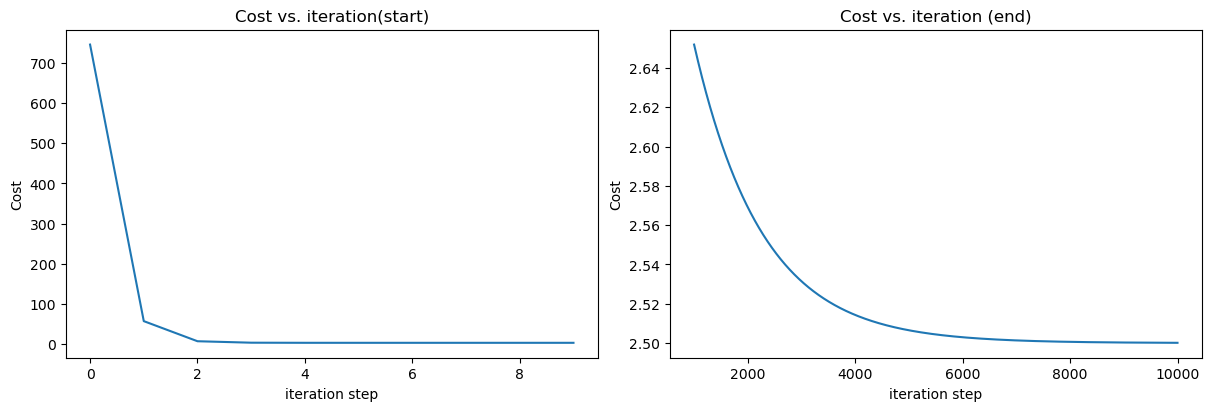

In [35]:
# Gradient descent settings
num_iters = 10000
alpha = 0.01   # Learning rate

# Run gradient descent

a1_opt, a0_opt, J_hist, p_hist = gradient_descent(x_train ,y_train, a1_init, a0_init, alpha, num_iters)

print(f"(a1, a0) found by gradient descent: ({a1_opt:8.4f}, {a0_opt:8.4f})")

# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:10])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

With this value of the learning rate, the cost decreases at a much faster rate than the learning rates used in previous exercises. This can be observed through the cost vs. iteration curve.

Iteration   10: Cost 5.70e+07  dj_da1:  7.783e+04, dj_da0:  6.797e+03   a1: -9.310e+02, a0:-8.13317e+01
Iteration   20: Cost 3.17e+11  dj_da1:  5.810e+06, dj_da0:  5.073e+05   a1: -7.042e+04, a0:-6.14975e+03
Iteration   30: Cost 1.77e+15  dj_da1:  4.336e+08, dj_da0:  3.787e+07   a1: -5.257e+06, a0:-4.59109e+05
Iteration   40: Cost 9.85e+18  dj_da1:  3.237e+10, dj_da0:  2.827e+09   a1: -3.924e+08, a0:-3.42690e+07
Iteration   50: Cost 5.49e+22  dj_da1:  2.416e+12, dj_da0:  2.110e+11   a1: -2.929e+10, a0:-2.55792e+09
Iteration   60: Cost 3.06e+26  dj_da1:  1.803e+14, dj_da0:  1.575e+13   a1: -2.186e+12, a0:-1.90929e+11
Iteration   70: Cost 1.70e+30  dj_da1:  1.346e+16, dj_da0:  1.176e+15   a1: -1.632e+14, a0:-1.42514e+13
Iteration   80: Cost 9.49e+33  dj_da1:  1.005e+18, dj_da0:  8.774e+16   a1: -1.218e+16, a0:-1.06376e+15
Iteration   90: Cost 5.29e+37  dj_da1:  7.500e+19, dj_da0:  6.549e+18   a1: -9.092e+17, a0:-7.94015e+16
Iteration  100: Cost 2.95e+41  dj_da1:  5.598e+21, dj_da0:  4.88

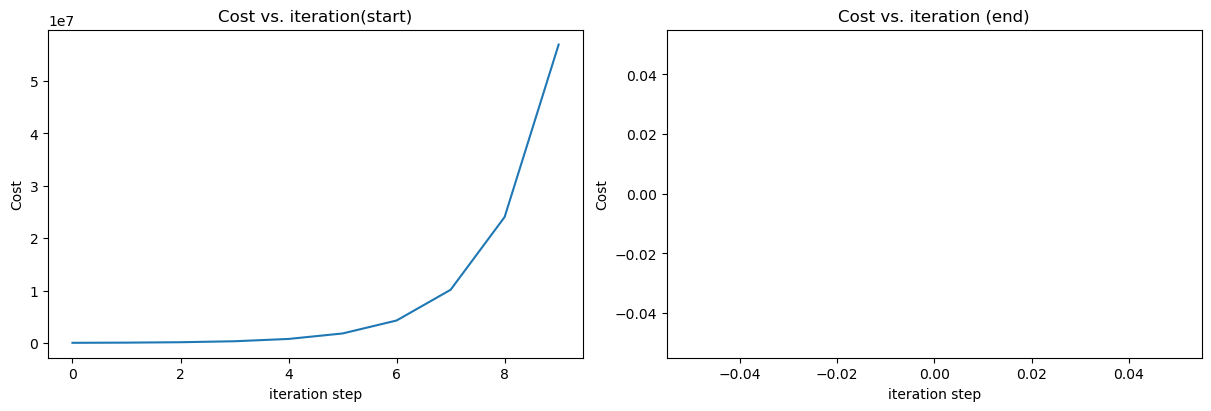

In [36]:
# Gradient descent settings
num_iters = 100
alpha = 0.02   # Learning rate

# Run gradient descent

a1_opt, a0_opt, J_hist, p_hist = gradient_descent(x_train ,y_train, a1_init, a0_init, alpha, num_iters)

print(f"(a1, a0) found by gradient descent: ({a1_opt:8.4f}, {a0_opt:8.4f})")

# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:10])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

For case (2), the learning rate is not correct, hence, it fails to converge in this case. This is computationally not feasible.